In [1]:
import pickle
import matplotlib.pyplot as plt

# import mod_kernik as kernik

#############################################
from scipy.integrate import ode, solve_ivp
import os, sys, time
import numpy as np
import matplotlib.pyplot as plt
import pickle
import bisect

sys.path.append('../')
sys.path.append('../Protocols')
sys.path.append('../Lib')
sys.path.append('../Models')
import simulator_scipy
import simulator_myokit
import model_response
from br1977 import BR1977
from ord2011 import ORD2011
import mod_kernik as kernik

import mod_trace as trace

import myokit

In [2]:
def get_high_fitness(ga_result):
    best_individual = ga_result.generations[0][0]

    for i, gen in enumerate(ga_result.generations):
        best_in_gen = ga_result.get_high_fitness_individual(i)
        if best_in_gen.fitness > best_individual.fitness:            
            best_individual = best_in_gen

    return best_individual

In [3]:
ga_result = 0
def plot_current_conributions(trial_conditions, prestep=2000, window=10, step_size=5, with_artefact=False):    
    model_name = trial_conditions.split('_')[0]
    currents = ['I_Na', 'I_Kr', 'I_Ks', 'I_To', 'I_CaL', 'I_K1', 'I_NaL' ]   
    if model_name=='BR1977':
        currents = ['I_Na', 'I_si', 'I_K1', 'I_x1']
    elif model_name=='Kernik':
        currents = ['I_Na', 'I_Kr', 'I_Ks', 'I_To', 'I_F', 'I_CaL', 'I_K1']

    for i, current in enumerate(currents):
        ga_result = pickle.load(open(f'ga_results/{trial_conditions}/ga_results_{current}_a{with_artefact}', 'rb'))
                
        best_individual = get_high_fitness(ga_result)
        protocol = best_individual.protocol
        print(protocol)
                
        tr = None
        if model_name=='ORD2011' :
            model = ORD2011(protocol)
            tr = model_response.get_model_response_JK(model, protocol, prestep=prestep)
        elif model_name=='OHara2017':
            model = '../mmt-model-files/ohara-cipa-v1-2017_VC.mmt'
            tr = model_response.get_model_response_with_myokit(model, protocol, prestep=prestep)
        elif model_name=='BR1977' :
            model = BR1977(protocol)  
            tr = model_response.get_model_response_JK(model, protocol, prestep=prestep)
        elif model_name=='Kernik':
            k = kernik.KernikModel(is_exp_artefact=True)        
            tr = k.generate_response(protocol, is_no_ion_selective=False)
               
        tr.plot_currents_contribution(current,  window=window, step_size=step_size, is_shown=True, title=current,
                saved_to=f'./ga_results/{trial_conditions}/{current}.svg')
        
        print(tr.current_response_info.get_max_current_contributions(tr.t, window=window, step_size=step_size))
        print('-'*100)

|STEP: Voltage: -118.14138975684332, Duration: 19.757042102314323| + |RAMP: Voltage Start: -48.19660891801054, Voltage End: 30.37349131996256, Duration: 49.376750982910096| + |RAMP: Voltage Start: -55.708345905639824, Voltage End: 25.32661633600952, Duration: 148.43764692546026| + |RAMP: Voltage Start: -53.6334649287954, Voltage End: 25.239093164217984, Duration: 163.42346226577718|


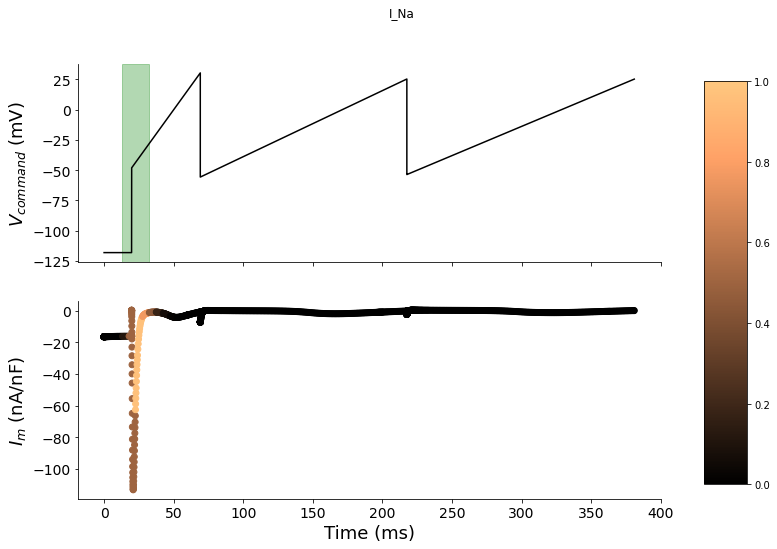

      Current  Contribution  Time Start  Time End
0        I_Na      0.966500        20.0      30.0
1       I_NaL      0.216557       110.0     120.0
2        I_To      0.033722        55.0      65.0
3       I_CaL      0.738253        45.0      55.0
4      I_CaNa      0.091796        55.0      65.0
5       I_CaK      0.053276       205.0     215.0
6        I_Kr      0.401133       255.0     265.0
7        I_Ks      0.016705       370.0     380.0
8        I_K1      0.991797         0.0      10.0
9      I_NaCa      0.119626       100.0     110.0
10  I_NaCa_ss      0.219414        75.0      85.0
11      I_NaK      0.169981       110.0     120.0
12       I_Kb      0.143701       370.0     380.0
13      I_Nab      0.013372        85.0      95.0
14      I_Cab      0.013350        80.0      90.0
15      I_pCa      0.000197       105.0     115.0
16        I_F      0.000000         0.0      10.0
17       I_up      0.000000         0.0      10.0
18     I_leak      0.000000         0.0      10.0


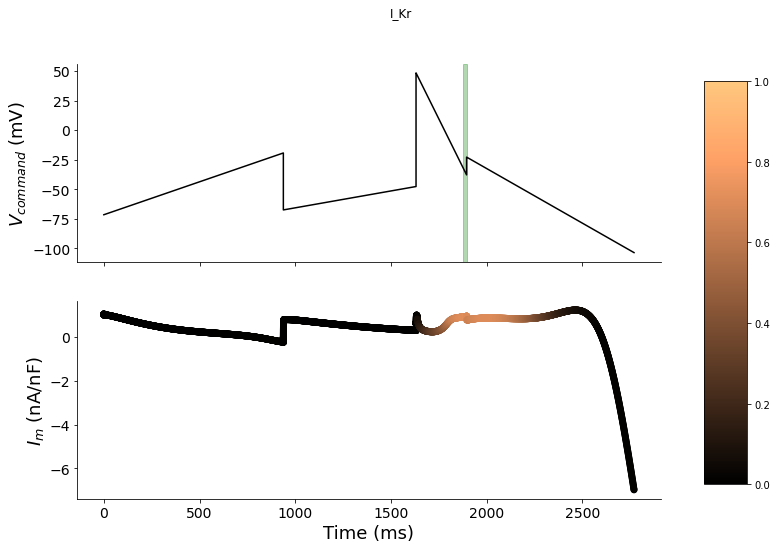

      Current  Contribution  Time Start  Time End
0        I_Na      0.026694         0.0      10.0
1       I_NaL      0.048276       565.0     575.0
2        I_To      0.180744      1635.0    1645.0
3       I_CaL      0.464639       925.0     935.0
4      I_CaNa      0.079862      1640.0    1650.0
5       I_CaK      0.175018      1635.0    1645.0
6        I_Kr      0.720874      1885.0    1895.0
7        I_Ks      0.023593      1810.0    1820.0
8        I_K1      0.970717      2755.0    2765.0
9      I_NaCa      0.079131      2595.0    2605.0
10  I_NaCa_ss      0.121993       765.0     775.0
11      I_NaK      0.426856      2595.0    2605.0
12       I_Kb      0.269794      1625.0    1635.0
13      I_Nab      0.087853      2595.0    2605.0
14      I_Cab      0.099209      2595.0    2605.0
15      I_pCa      0.000336      2595.0    2605.0
16        I_F      0.000000         0.0      10.0
17       I_up      0.000000         0.0      10.0
18     I_leak      0.000000         0.0      10.0


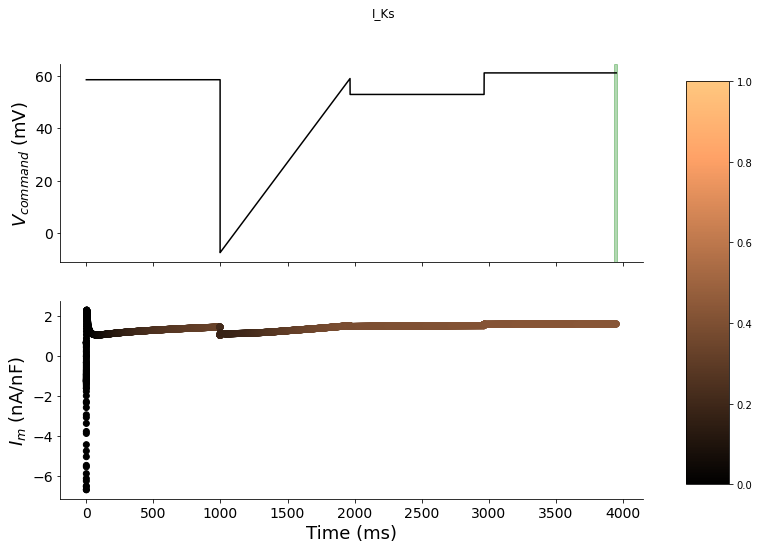

      Current  Contribution  Time Start  Time End
0        I_Na      0.359965         0.0      10.0
1       I_NaL      0.021817        55.0      65.0
2        I_To      0.294193         5.0      15.0
3       I_CaL      0.129508         5.0      15.0
4      I_CaNa      0.045245        10.0      20.0
5       I_CaK      0.213308        10.0      20.0
6        I_Kr      0.586003      1000.0    1010.0
7        I_Ks      0.431418      3940.0    3950.0
8        I_K1      0.004429      1000.0    1010.0
9      I_NaCa      0.102825       220.0     230.0
10  I_NaCa_ss      0.038411       105.0     115.0
11      I_NaK      0.155495       265.0     275.0
12       I_Kb      0.315301       275.0     285.0
13      I_Nab      0.003967      1000.0    1010.0
14      I_Cab      0.002725      1000.0    1010.0
15      I_pCa      0.000089       225.0     235.0
16        I_F      0.000000         0.0      10.0
17       I_up      0.000000         0.0      10.0
18     I_leak      0.000000         0.0      10.0


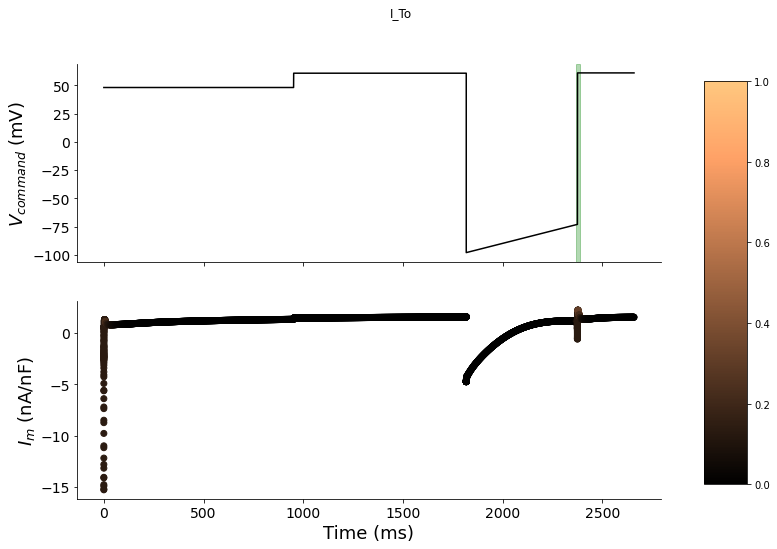

      Current  Contribution  Time Start  Time End
0        I_Na      0.385393         0.0      10.0
1       I_NaL      0.030988        60.0      70.0
2        I_To      0.315363      2375.0    2385.0
3       I_CaL      0.230833         5.0      15.0
4      I_CaNa      0.067643         5.0      15.0
5       I_CaK      0.234119      2385.0    2395.0
6        I_Kr      0.227323       305.0     315.0
7        I_Ks      0.395075      1805.0    1815.0
8        I_K1      0.909167      1870.0    1880.0
9      I_NaCa      0.153437      2040.0    2050.0
10  I_NaCa_ss      0.038603      2040.0    2050.0
11      I_NaK      0.441177      2040.0    2050.0
12       I_Kb      0.288365       305.0     315.0
13      I_Nab      0.093826      2040.0    2050.0
14      I_Cab      0.105951      2040.0    2050.0
15      I_pCa      0.000449      2040.0    2050.0
16        I_F      0.000000         0.0      10.0
17       I_up      0.000000         0.0      10.0
18     I_leak      0.000000         0.0      10.0


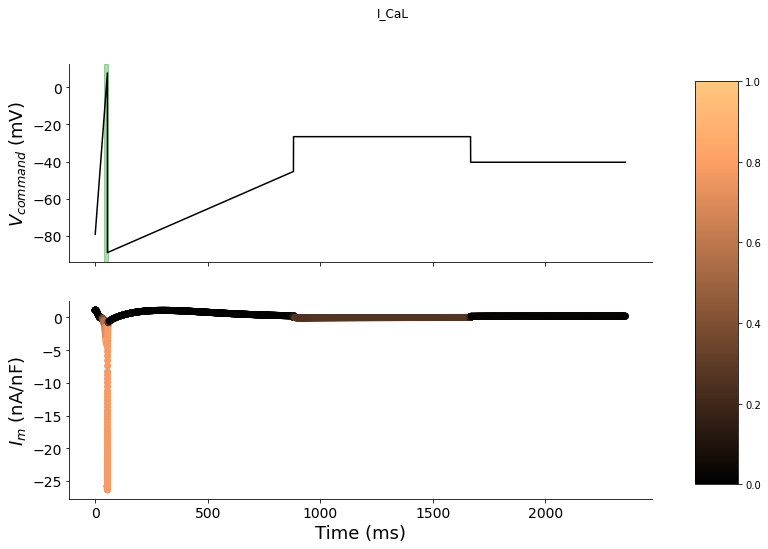

      Current  Contribution  Time Start  Time End
0        I_Na      0.312512        15.0      25.0
1       I_NaL      0.308219        25.0      35.0
2        I_To      0.051438       880.0     890.0
3       I_CaL      0.865914        45.0      55.0
4      I_CaNa      0.064747        40.0      50.0
5       I_CaK      0.014944        40.0      50.0
6        I_Kr      0.052673      1675.0    1685.0
7        I_Ks      0.006593      1655.0    1665.0
8        I_K1      0.860557         0.0      10.0
9      I_NaCa      0.187911        80.0      90.0
10  I_NaCa_ss      0.482056        70.0      80.0
11      I_NaK      0.377128       875.0     885.0
12       I_Kb      0.048987       880.0     890.0
13      I_Nab      0.040109        75.0      85.0
14      I_Cab      0.045287        75.0      85.0
15      I_pCa      0.000296        75.0      85.0
16        I_F      0.000000         0.0      10.0
17       I_up      0.000000         0.0      10.0
18     I_leak      0.000000         0.0      10.0


/opt/conda/lib/python3.7/site-packages/scipy/integrate/_ivp/bdf.py:403: RuntimeWarning: invalid value encountered in subtract
  D[order + 2] = d - D[order + 1]


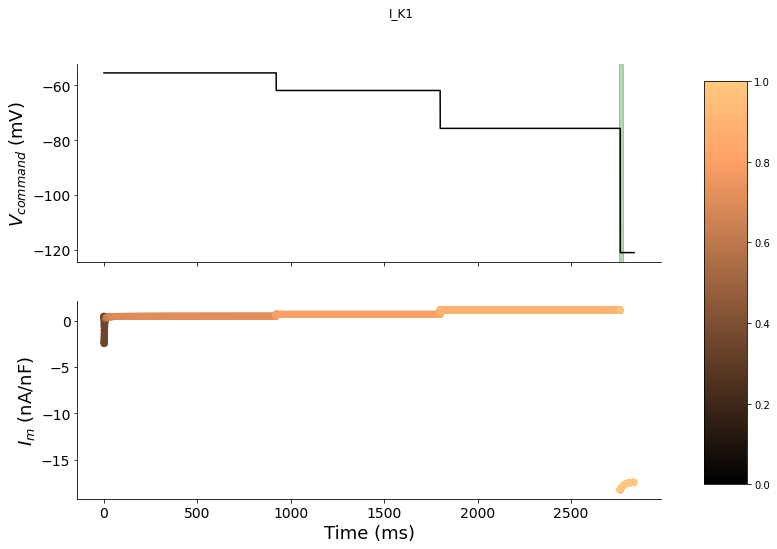

      Current  Contribution  Time Start  Time End
0        I_Na  5.110327e-01         0.0      10.0
1       I_NaL  3.217512e-02        20.0      30.0
2        I_To  9.128805e-03       640.0     650.0
3       I_CaL  4.564648e-04       910.0     920.0
4      I_CaNa  2.728705e-05       910.0     920.0
5       I_CaK  7.148761e-07       910.0     920.0
6        I_Kr  7.278875e-04       910.0     920.0
7        I_Ks  3.903560e-06       910.0     920.0
8        I_K1  9.927339e-01      2765.0    2775.0
9      I_NaCa  2.376835e-02       815.0     825.0
10  I_NaCa_ss  6.541241e-03       730.0     740.0
11      I_NaK  1.833460e-01       735.0     745.0
12       I_Kb  3.746140e-03       910.0     920.0
13      I_Nab  2.138722e-02       910.0     920.0
14      I_Cab  2.236068e-02       910.0     920.0
15      I_pCa  1.096025e-04       910.0     920.0
16        I_F  0.000000e+00         0.0      10.0
17       I_up  0.000000e+00         0.0      10.0
18     I_leak  0.000000e+00         0.0      10.0


/opt/conda/lib/python3.7/site-packages/scipy/integrate/_ivp/bdf.py:403: RuntimeWarning: invalid value encountered in subtract
  D[order + 2] = d - D[order + 1]


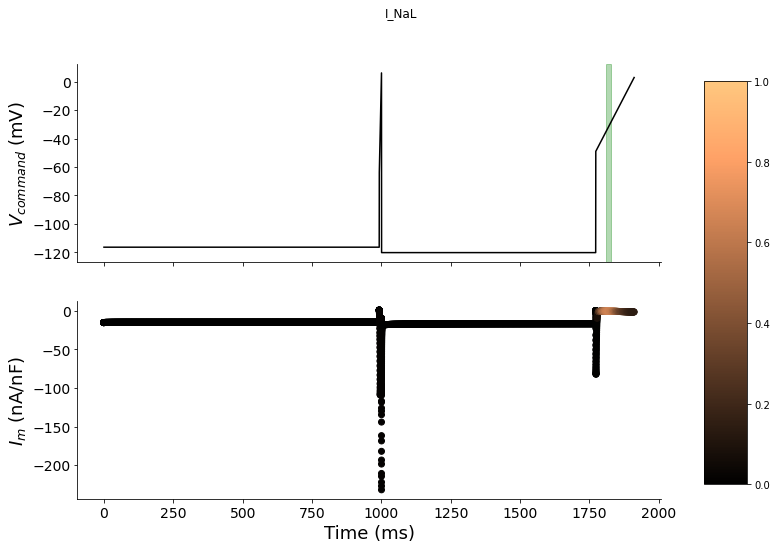

      Current  Contribution  Time Start  Time End
0        I_Na      0.824447      1775.0    1785.0
1       I_NaL      0.652992      1815.0    1825.0
2        I_To      0.024951      1900.0    1910.0
3       I_CaL      0.592350      1900.0    1910.0
4      I_CaNa      0.061030      1900.0    1910.0
5       I_CaK      0.019125      1900.0    1910.0
6        I_Kr      0.003811      1900.0    1910.0
7        I_Ks      0.000733      1900.0    1910.0
8        I_K1      0.991421      1760.0    1770.0
9      I_NaCa      0.022501      1805.0    1815.0
10  I_NaCa_ss      0.051606      1865.0    1875.0
11      I_NaK      0.131865      1820.0    1830.0
12       I_Kb      0.038230      1900.0    1910.0
13      I_Nab      0.010085      1800.0    1810.0
14      I_Cab      0.009643      1795.0    1805.0
15      I_pCa      0.000082      1810.0    1820.0
16        I_F      0.000000         0.0      10.0
17       I_up      0.000000         0.0      10.0
18     I_leak      0.000000         0.0      10.0


In [4]:
if __name__ == '__main__':
    trial_conditions = "ORD2011_504_101_4_-121_61_10_5"
    plot_current_conributions(trial_conditions, prestep=2000, window=10, step_size=5, with_artefact=False)  
    print("=====Complete==============================")